In [1]:
import pandas as pd
import json,os
import numpy as np
import matplotlib as plt


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("agrafintech/world-happiness-index-and-inflation-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Adelka\.cache\kagglehub\datasets\agrafintech\world-happiness-index-and-inflation-dataset\versions\2


In [3]:
df = pd.read_csv('C:/Users/Adelka/Downloads/heart_disease_uci.csv')
#df = df.set_index('id')

In [4]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


Hodnota oldpeak	Interpretace

0.0	Žádná ST deprese (normální stav)
0.5 - 1.0	Mírná ST deprese
1.0 - 2.0	Střední riziko ischemie
2.0+	Vysoké riziko srdeční ischemie


In [5]:
sex_oldpeak_pivottable = df.pivot_table(index='num', columns= 'sex' ,values='oldpeak', aggfunc='mean')
sex_oldpeak_pivottable

# num -> různé stupně srdečního onemocnění
# oldpack -> ST deprese indukovaná zátěžovým testem (ST depression induced by exercise relative to rest)

# Hodnota oldpeak	Interpretace
# 0.0	Žádná ST deprese (normální stav)
# 0.5 - 1.0	Mírná ST deprese
# 1.0 - 2.0	Střední riziko ischemie
# 2.0+	Vysoké riziko srdeční ischemie


sex,Female,Male
num,,
0,0.434965,0.408502
1,0.723333,1.039091
2,1.970000,1.285714
3,2.550000,1.487952
4,2.500000,2.291667


In [6]:
df['sex'].isnull().sum()

np.int64(0)

In [7]:
age_chol_pivot = df.drop_duplicates(subset=['sex', 'cp'])

age_chol_pivot = pd.pivot(df, index= 'id', columns= 'cp', values= 'chol')

age_chol_pivot

cp,asymptomatic,atypical angina,non-anginal,typical angina
id,,,,
1,NaN,NaN,NaN,233.0
2,286.0,NaN,NaN,NaN
3,229.0,NaN,NaN,NaN
4,NaN,NaN,250.0,NaN
5,NaN,204.0,NaN,NaN
...,...,...,...,...
916,333.0,NaN,NaN,NaN
917,NaN,NaN,NaN,139.0
918,223.0,NaN,NaN,NaN


🔹 Řešení: Vytvoření úplné kombinace pomocí pd.merge()

Můžeš uměle vytvořit všechny možné kombinace id a cp, aby se zajistilo, že každé id má všechny kategorie cp. Uděláš to tak, že vytvoříš nový DataFrame s všemi možnými kombinacemi id a cp a pak spojíš s původními daty.

In [8]:
# Jak na to?
#1️⃣ Vytvoř seznam všech unikátních id a všech kategorií cp:

id_values = df['id'].unique()
cp_values = df['cp'].unique()

In [9]:
# 2️⃣ Vytvoř kartézský součin (id × cp) pomocí pd.MultiIndex:

full_index = pd.MultiIndex.from_product([id_values, cp_values], names=['id', 'cp'])
print(full_index)

MultiIndex([(  1,  'typical angina'),
            (  1,    'asymptomatic'),
            (  1,     'non-anginal'),
            (  1, 'atypical angina'),
            (  2,  'typical angina'),
            (  2,    'asymptomatic'),
            (  2,     'non-anginal'),
            (  2, 'atypical angina'),
            (  3,  'typical angina'),
            (  3,    'asymptomatic'),
            ...
            (918,     'non-anginal'),
            (918, 'atypical angina'),
            (919,  'typical angina'),
            (919,    'asymptomatic'),
            (919,     'non-anginal'),
            (919, 'atypical angina'),
            (920,  'typical angina'),
            (920,    'asymptomatic'),
            (920,     'non-anginal'),
            (920, 'atypical angina')],
           names=['id', 'cp'], length=3680)


3️⃣ Vytvoř nový DataFrame a proveď merge:

In [10]:
full_df = pd.DataFrame(index= full_index).reset_index()
df_full = full_df.merge(df, on=['id', 'cp'], how='left')
df_full

,id,cp,age,sex,dataset,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,typical angina,63.0,Male,Cleveland,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0.0
1,1,asymptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,non-anginal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,atypical angina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,typical angina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,919,atypical angina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3676,920,typical angina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3677,920,asymptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3678,920,non-anginal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
merge_id_cp_pivot = pd.pivot(df, index= 'id', columns= 'cp', values= 'chol')
merge_id_cp_pivot

cp,asymptomatic,atypical angina,non-anginal,typical angina
id,,,,
1,NaN,NaN,NaN,233.0
2,286.0,NaN,NaN,NaN
3,229.0,NaN,NaN,NaN
4,NaN,NaN,250.0,NaN
5,NaN,204.0,NaN,NaN
...,...,...,...,...
916,333.0,NaN,NaN,NaN
917,NaN,NaN,NaN,139.0
918,223.0,NaN,NaN,NaN


In [12]:
import seaborn as sns

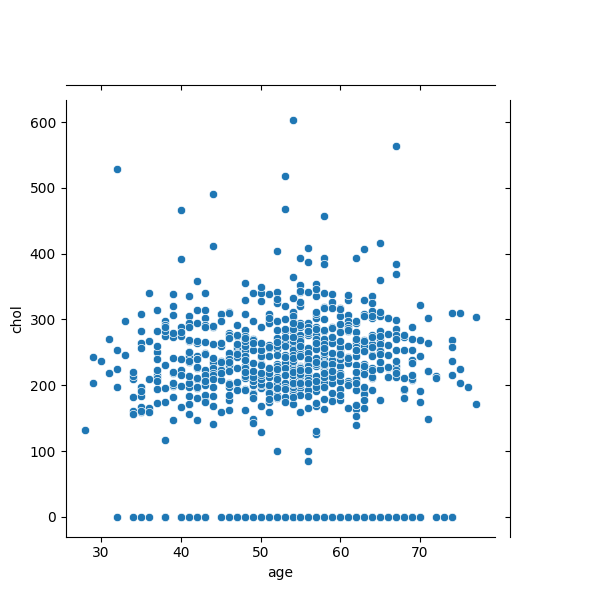

In [13]:
g= sns.JointGrid(df, x='age', y='chol')
g.plot_joint(sns.scatterplot)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [15]:
#id_values.info()

Chi2 test - independence test

In [16]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [17]:
import pandas as pd
import scipy.stats as stats

H0: Between maile and isnt statisticl diferences in slope.
H1: Between maile and famile exist statistics differences in slope.


Slope in Stress Test (ST Depression Slope)

Upsloping is usually normal.

Flat may indicate moderate heart disease.

Downsloping is often linked to severe heart disease.

=

Stoupající sklon je obvykle normální.

Plochá může znamenat středně těžké srdeční onemocnění.

Downsloping je často spojen se závažným srdečním onemocněním.

In [18]:
conting_tab = pd.crosstab(df['sex'],df['slope'])
conting_tab

slope,downsloping,flat,upsloping
sex,,,
Female,7,69,57
Male,56,276,146


In [19]:
chi2, p, dof, expected = stats.chi2_contingency(conting_tab)

In [37]:
expected

array([[ 13.71358429,  75.09819967,  44.18821604],
       [ 49.28641571, 269.90180033, 158.81178396]])

In [20]:
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index= conting_tab.index, columns= conting_tab.columns))

Chi-Square Statistic: 9.582322922613194
P-value: 0.00830280838886202
Degrees of Freedom: 2
Expected Frequencies Table:
slope   downsloping      flat   upsloping
sex                                      
Female    13.713584   75.0982   44.188216
Male      49.286416  269.9018  158.811784


In [40]:
import numpy as np
from scipy.stats import chi2_contingency

standardized_residuals = (conting_tab - expected)/np.sqrt(expected)
print(standardized_residuals)




slope   downsloping      flat  upsloping
sex                                     
Female    -1.812921 -0.703699   1.927331
Male       0.956293  0.371192  -1.016642


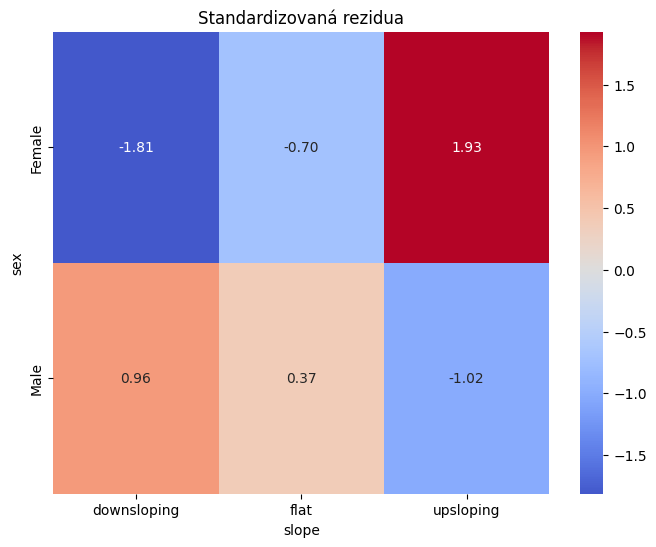

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(standardized_residuals, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Standardizovaná rezidua")
plt.show()

In [21]:
df['age'].mean()

np.float64(53.51086956521739)

In [22]:
agreg_min = df.groupby('sex')['age'].min()
agreg_min

sex
Female    30
Male      28
Name: age, dtype: int64

In [23]:
# thalach obvykle znamená maximální dosaženou srdeční frekvenci během testu s fyzickou zátěží (treadmill test)

agreg_var = df.groupby('sex')['thalch'].var()
agreg_var

sex
Female    492.531386
Male      696.440852
Name: thalch, dtype: float64

- Rozptyl poskytuje informaci o tom, jak jsou data rozložena kolem průměru. Vyšší rozptyl znamená, že hodnoty jsou více rozptýlené, zatímco nižší rozptyl naznačuje, že hodnoty jsou blíže k průměru

- V ekonomii, financích nebo přírodních vědách se rozptyl často používá jako indikátor rizika nebo nestability. Například vyšší rozptyl cen akcií může znamenat větší volatilitu a tedy riziko.

- Pomocí rozptylu můžeme porovnat variabilitu dvou nebo více skupin dat. Například pokud máme dvě třídy studentů, můžeme pomocí rozptylu zjistit, která třída má více heterogenní výsledky testů.

- Rozptyl je klíčovou součástí mnoha statistických metod, jako je směrodatná odchylka, kovariance, korelace nebo analýza rozptylu (ANOVA).

In [24]:
agreg_std = df.groupby('sex')['thalch'].std()
agreg_std

sex
Female    22.193048
Male      26.390166
Name: thalch, dtype: float64

Nízká hodnota std : Data jsou blízko průměru, což znamená, že jsou málo rozptýlená.
Vysoká hodnota std : Data jsou více rozptýlená od průměru, což naznačuje vyšší variabilitu.

Standardní odchylka pomáhá pochopit, jak moc jsou data rozptýlena kolem průměru.


Bez standardní odchylky bychom nemohli adekvátně popsat variabilitu dat, identifikovat odlehlé hodnoty, testovat hypotézy nebo normalizovat data pro strojové učení.

In [25]:
agreg_mean = df.groupby('sex')['thalch'].mean()
agreg_mean = agreg_mean.to_frame()
agreg_mean

,thalch
sex,
Female,146.244792
Male,135.063893


In [26]:
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Anova slope a chol

In [27]:
from scipy.stats import f_oneway

In [28]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [29]:
df_bez_nan_slope = df[df['slope'].notna()]
df_bez_nan_slope = df[df['chol'].notna()] 
df_bez_nan_slope = df[df['chol'] > 0] 
df_bez_nan_slope.head(5)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [30]:
slope_downsloping = df_bez_nan_slope[df_bez_nan_slope['slope'] == 'downsloping']['chol']
slope_flat = df_bez_nan_slope[df_bez_nan_slope['slope'] == 'flat']['chol']
slope_upsloping = df_bez_nan_slope[df_bez_nan_slope['slope'] == 'upsloping']['chol']


In [31]:
#pd.pivot(df_bez_nan_slope, columns= 'slope', values= 'chol', fill_value= 0)

In [32]:
f_stat, p_value = f_oneway(slope_downsloping, slope_flat, slope_upsloping)

print(f"F-statistika: {f_stat}")
print(f"P-hodnota: {p_value}")

F-statistika: 1.164053197580603
P-hodnota: 0.31312818738362597


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
model = ols('chol ~ slope', data=df_bez_nan_slope).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F    PR(>F)
slope     7.603419e+03    2.0  1.164053  0.313128
Residual  1.515389e+06  464.0       NaN       NaN


C:\Users\Adelka\AppData\Local\Temp\ipykernel_10608\4228933275.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  slope_plot = sns.boxplot(df_bez_nan_slope, x= 'slope', y= 'chol', palette='Reds')


[Text(0.5, 0, 'Slope category'),
 Text(0, 0.5, 'Amount of Cholesterol'),
 Text(0.5, 1.0, 'Amount of choleterol in Slope category')]

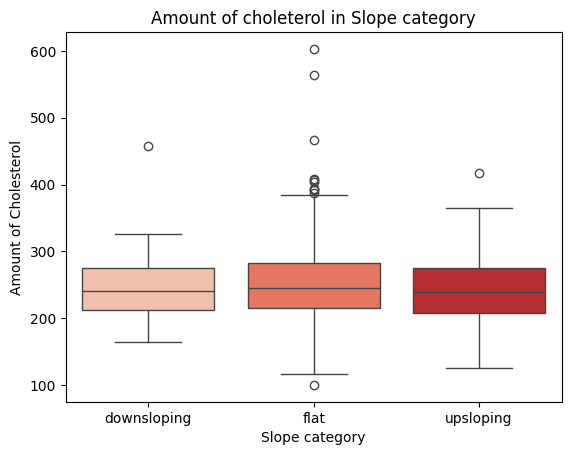

In [35]:
slope_plot = sns.boxplot(df_bez_nan_slope, x= 'slope', y= 'chol', palette='Reds')
slope_plot.set(xlabel= "Slope category", ylabel= "Amount of Cholesterol", title= "Amount of choleterol in Slope category")

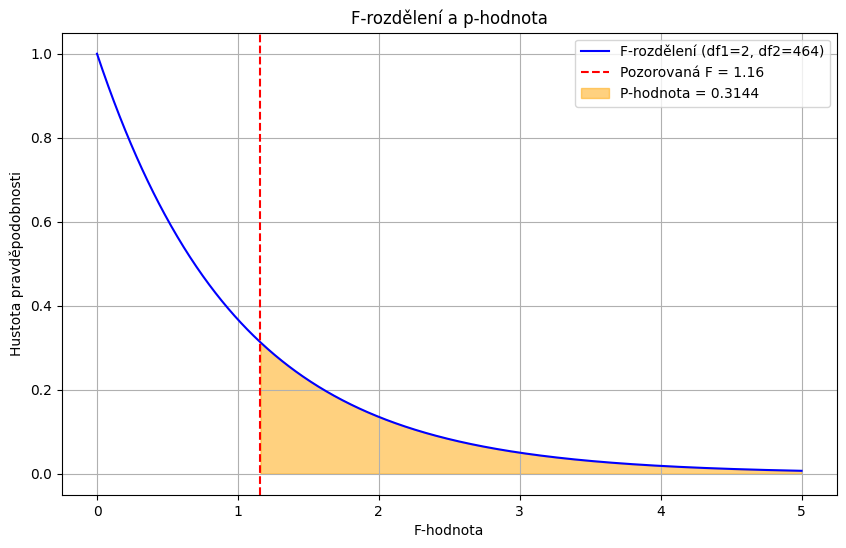

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parametry
df1 = 2       # Stupně volnosti pro čitatel
df2 = 464     # Stupně volnosti pro jmenovatel
F_observed = 1.16  # Pozorovaná F-hodnota

# Vytvoření rozdělení
x = np.linspace(0, 5, 1000)  # Rozsah hodnot F
y = f.pdf(x, df1, df2)       # Hustota pravděpodobnosti F-rozdělení

# Výpočet p-hodnoty
p_value = f.sf(F_observed, df1, df2)

# Vykreslení grafu
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"F-rozdělení (df1={df1}, df2={df2})", color="blue")

# Pozorovaná F-hodnota
plt.axvline(F_observed, color="red", linestyle="--", label=f"Pozorovaná F = {F_observed:.2f}")

# P-hodnota (vyšrafovaná plocha)
x_fill = np.linspace(F_observed, 5, 100)
y_fill = f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color="orange", alpha=0.5, label=f"P-hodnota = {p_value:.4f}")

# Popisky
plt.title("F-rozdělení a p-hodnota")
plt.xlabel("F-hodnota")
plt.ylabel("Hustota pravděpodobnosti")
plt.legend()
plt.grid(True)
plt.show()

Vycenásobná ANOVA